In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [74]:
# Read in the image
image = cv2.imread('D:\\Algorithmo\\Computer vision\\harry.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (317, 272, 3)


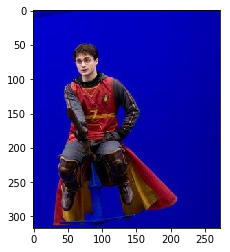

In [75]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR) because openCV load image as BGR
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

### Define the color threshold

In [103]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,0,90]) 
upper_green = np.array([50,50,255])

### Create a mask

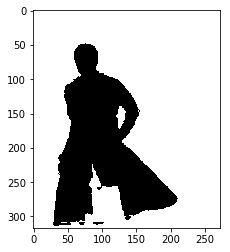

In [104]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

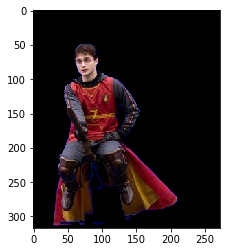

In [105]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it
plt.imshow(masked_image)

### Mask and add a background image

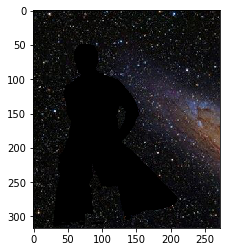

In [106]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('D:\\Algorithmo\\Computer vision\\space.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:317, 0:272]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)



### Create a complete image

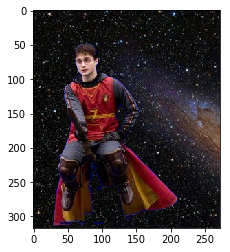

In [107]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)